In [46]:

import os
import zipfile
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training pokemon pictures
train_abra_dir = os.path.join(train_dir, 'Abra')
train_arcanine_dir = os.path.join(train_dir, 'Arcanine')
train_bulbasaur_dir = os.path.join(train_dir, 'Bulbasaur')
train_ditto_dir = os.path.join(train_dir, 'Ditto')
train_eevee_dir = os.path.join(train_dir, 'Eevee')
train_gastly_dir = os.path.join(train_dir, 'Gastly')
train_gengar_dir = os.path.join(train_dir, 'Gengar')
train_jigglypuff_dir = os.path.join(train_dir, 'Jigglypuff')
train_other_dir = os.path.join(train_dir, 'Other')
train_pikachu_dir = os.path.join(train_dir, 'Pikachu')

# Directory with our validation pokemon pictures
validation_abra_dir = os.path.join(validation_dir, 'Abra')
validation_arcanine_dir = os.path.join(validation_dir, 'Arcanine')
validation_bulbasaur_dir = os.path.join(validation_dir, 'Bulbasaur')
validation_ditto_dir = os.path.join(validation_dir, 'Ditto')
validation_eevee_dir = os.path.join(validation_dir, 'Eevee')
validation_gastly_dir = os.path.join(validation_dir, 'Gastly')
validation_gengar_dir = os.path.join(validation_dir, 'Gengar')
validation_jigglypuff_dir = os.path.join(validation_dir, 'Jigglypuff')
validation_other_dir = os.path.join(validation_dir, 'Other')
validation_pikachu_dir = os.path.join(validation_dir, 'Pikachu')

In [47]:
train_abra_fnames = os.listdir(train_abra_dir)
train_abra_fnames.sort()
print(train_abra_fnames[:10])

train_arcanine_fnames = os.listdir(train_arcanine_dir)
train_arcanine_fnames.sort()

train_bulbasaur_fnames = os.listdir(train_bulbasaur_dir)
train_bulbasaur_fnames.sort()

train_ditto_fnames = os.listdir(train_ditto_dir)
train_ditto_fnames.sort()

train_eevee_fnames = os.listdir(train_eevee_dir)
train_eevee_fnames.sort()

train_gastly_fnames = os.listdir(train_gastly_dir)
train_gastly_fnames.sort()

train_gengar_fnames = os.listdir(train_gengar_dir)
train_gengar_fnames.sort()

train_jigglypuff_fnames = os.listdir(train_jigglypuff_dir)
train_jigglypuff_fnames.sort()

train_other_fnames = os.listdir(train_other_dir)
train_other_fnames.sort()

train_pikachu_fnames = os.listdir(train_pikachu_dir)
train_pikachu_fnames.sort()

['abra.0282b2f3a22745f1a436054ea15a0ae5.jpg', 'abra.0282b2f3a22745f1a436054ea15a0ae5ab1.jpg', 'abra.0282b2f3a22745f1a436054ea15a0ae5ab2.jpg', 'abra.0282b2f3a22745f1a436054ea15a0ae5ab3.jpg', 'abra.0282b2f3a22745f1a436054ea15a0ae5ab4.jpg', 'abra.0282b2f3a22745f1a436054ea15a0ae5ab6.jpg', 'abra.0282b2f3a22745f1a436054ea15a0ae5ab7.jpg', 'abra.0282b2f3a22745f1a436054ea15a0ae5ab8.jpg', 'abra.0282b2f3a22745f1a436054ea15a0ae5az0.jpg', 'abra.0282b2f3a22745f1a436054ea15a0ae5az1.jpg']


In [48]:
print('total training abra images:', len(os.listdir(train_abra_dir)))

print('total validation abra images:', len(os.listdir(validation_abra_dir)))

total training abra images: 1353
total validation abra images: 339


In [49]:
import glob # glob patterns specify sets of filenames with wildcard characters
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

#!pip3 install keras
#!pip3 install tensorflow
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

IMG_DIM = (128, 128)

train_files = glob.glob(train_abra_dir+"/*") + glob.glob(train_arcanine_dir+"/*") + glob.glob(train_bulbasaur_dir+"/*") + glob.glob(train_ditto_dir+"/*") + glob.glob(train_eevee_dir+"/*") + glob.glob(train_gastly_dir+"/*") + glob.glob(train_gengar_dir+"/*") + glob.glob(train_jigglypuff_dir+"/*")  + glob.glob(train_pikachu_dir+"/*") + glob.glob(train_other_dir+"/*")
#print(train_files)
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files] # img_to_array - konverzija slike u 3Dnumpy array
train_imgs = np.array(train_imgs)
train_imgs = train_imgs.reshape(len(train_files), 128, 128, 3)
train_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob(validation_abra_dir+"/*") + glob.glob(validation_arcanine_dir+"/*") + glob.glob(validation_bulbasaur_dir+"/*") + glob.glob(validation_ditto_dir+"/*") + glob.glob(validation_eevee_dir+"/*") + glob.glob(validation_gastly_dir+"/*") + glob.glob(validation_gengar_dir+"/*") + glob.glob(validation_jigglypuff_dir+"/*")+ glob.glob(validation_pikachu_dir+"/*") + glob.glob(validation_other_dir+"/*")
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_imgs = validation_imgs.reshape(len(validation_files), 128, 128, 3)
validation_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in validation_files]

#print(validation_labels)
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)


Train dataset shape: (15852, 128, 128, 3) 	Validation dataset shape: (3969, 128, 128, 3)


In [50]:
print(np.shape(train_imgs[0]))

(128, 128, 3)


In [51]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
#array_to_img(train_imgs[0])

(128, 128, 3)


In [52]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.fit_transform(train_labels)
validation_labels_enc = le.fit_transform(validation_labels)

print(train_labels[45:55], train_labels_enc[45:55])

['data\\train\\Abra\\abra', 'data\\train\\Abra\\abra', 'data\\train\\Abra\\abra', 'data\\train\\Abra\\abra', 'data\\train\\Abra\\abra', 'data\\train\\Abra\\abra', 'data\\train\\Abra\\abra', 'data\\train\\Abra\\abra', 'data\\train\\Abra\\abra', 'data\\train\\Abra\\abra'] [0 0 0 0 0 0 0 0 0 0]


In [65]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D, BatchNormalization
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

In [67]:
num_classes = 10

model = Sequential()
# 1. konvolucioni sloj: 16 filtera veličine 3 x 3
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(128, 128, 1), activation='relu'))
# MaxPool 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2. konvolucioni sloj: 32 filtera veličine 3 x 3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# MaxPool 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3. konvolucioni sloj: 64 filtera veličine 3 x 3 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# MaxPool 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))
""" 
model.add(ZeroPadding2D(input_shape=(128, 128, 1), padding=(3, 3)))
#model.add(BatchNormalization(axis=3))

model.add(Conv2D(192, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 1. konvolucioni sloj: 16 filtera veličine 3 x 3
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(128, 128, 1), activation='relu'))
# MaxPool 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2. konvolucioni sloj: 32 filtera veličine 3 x 3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# MaxPool 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3. konvolucioni sloj: 64 filtera veličine 3 x 3 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# MaxPool 2 x 2
model.add(MaxPooling2D(pool_size=(2, 2)))
"""
# "Izravnavanje" (flatten) feature mape na 1-dimenzioni vektor (za prosleđivanje 
# potpuno povezanom sloju)
model.add(Flatten())

# Potpuno povezani skriveni sloj sa 512 neurona i ReLu aktivacionom funkcijom
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00005), metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 64)      

In [55]:
import os
import gzip
import pickle
import numpy as np
from skimage.feature import hog
from matplotlib import pyplot as plt

# Extract HOG features 
def extract_HOG_features(data):
    num_samples = data.shape[0]
    #print(num_samples)
    hog_features = []
    for i in range(num_samples):
        img = data[i]
        #print(img)
        #feature, img = hog(img, orientations=15, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2', feature_vector=False, visualize = True, channel_axis=2)
        feature, img = hog(img, orientations=15, pixels_per_cell=(2, 2), cells_per_block=(8, 8), block_norm='L2', feature_vector=False, visualize = True, channel_axis=-1)
        hog_features.append(img)
        #print(img.shape)
        #plt.imshow(img)
        #plt.show()
    return np.array(hog_features)

In [56]:
#print(train_imgs_scaled)
train_imgs_scaled = extract_HOG_features(train_imgs_scaled)
print(train_imgs_scaled.shape)
validation_imgs_scaled = extract_HOG_features(validation_imgs_scaled)

(15852, 128, 128)


[[[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.03681661]
  [0.        ]
  ...
  [0.03250375]
  [0.        ]
  [0.01380663]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.        ]
  [0.09201578]
  [0.        ]
  ...
  [0.07017444]
  [0.        ]
  [0.03985796]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.07909239]
  [0.        ]
  ...
  [0.04497081]
  [0.        ]
  [0.01932178]]]


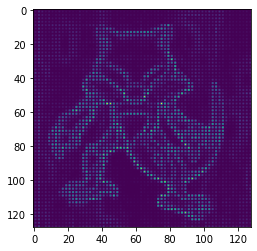

In [57]:
#print(train_imgs_scaled[0])
plt.imshow(train_imgs_scaled[0])
plt.show()

In [ ]:

input_shape = (150, 150, 3)
#print(train_imgs_scaled)
history = model.fit(x=train_imgs_scaled, y=tf.one_hot(train_labels_enc, 10),
                    validation_data=(validation_imgs_scaled, tf.one_hot(validation_labels_enc, 10)),
                    batch_size=150, 
                    epochs=20, 
                    verbose=1)
model.save("model1.hdf5")

Epoch 1/20
106/106 [==============================] - 65s 613ms/step - loss: 1.7377 - accuracy: 0.4530 - val_loss: 1.6615 - val_accuracy: 0.4810
Epoch 2/20
106/106 [==============================] - 63s 593ms/step - loss: 1.5878 - accuracy: 0.4960 - val_loss: 1.5353 - val_accuracy: 0.5125
Epoch 3/20
106/106 [==============================] - 64s 601ms/step - loss: 1.4777 - accuracy: 0.5238 - val_loss: 1.4441 - val_accuracy: 0.5510
Epoch 4/20
106/106 [==============================] - 67s 637ms/step - loss: 1.3865 - accuracy: 0.5560 - val_loss: 1.3771 - val_accuracy: 0.5629
Epoch 5/20
 30/106 [=======>......................] - ETA: 56s - loss: 1.3020 - accuracy: 0.5818

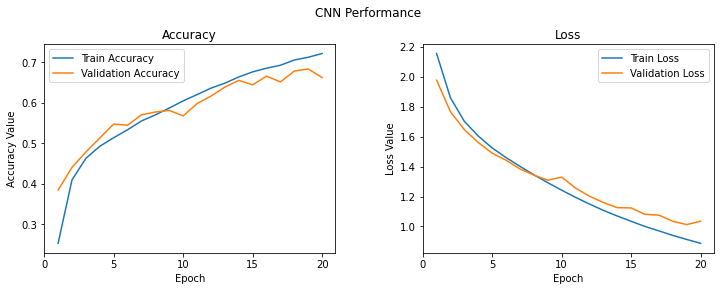

In [61]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,21))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 21, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 21, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")